In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load dataset


In [2]:
# Get data

import pandas as pd
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
dataset = data.frame
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# print labels for target values

[
    print(f"{target}: {label}")
    for target, label in zip(data.target.unique(), data.target_names)
]

0: setosa
1: versicolor
2: virginica


[None, None, None]

In [4]:
# feature names

dataset.columns = [
    colname.strip(" (cm)").replace(" ", "_") for colname in dataset.columns.tolist()
]

feature_names = dataset.columns.tolist()[:4]
feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Features engineering


In [5]:
dataset["sepal_length_to_sepal_width"] = (
    dataset["sepal_length"] / dataset["sepal_width"]
)
dataset["petal_length_to_petal_width"] = (
    dataset["petal_length"] / dataset["petal_width"]
)


dataset = dataset[
    [
        "sepal_length",
        "sepal_width",
        "petal_length",
        "petal_width",
        #     'sepal_length_in_square', 'sepal_width_in_square', 'petal_length_in_square', 'petal_width_in_square',
        "sepal_length_to_sepal_width",
        "petal_length_to_petal_width",
        "target",
    ]
]

In [6]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_to_sepal_width,petal_length_to_petal_width,target
0,5.1,3.5,1.4,0.2,1.457143,7.0,0
1,4.9,3.0,1.4,0.2,1.633333,7.0,0
2,4.7,3.2,1.3,0.2,1.468750,6.5,0
3,4.6,3.1,1.5,0.2,1.483871,7.5,0
4,5.0,3.6,1.4,0.2,1.388889,7.0,0


# Split dataset


In [7]:
test_size = 0.1

## Splittail train/test


In [8]:
train_dataset, test_dataset = train_test_split(
    dataset, test_size=test_size, random_state=43
)

train_dataset.shape, test_dataset.shape

((135, 7), (15, 7))

# Train


In [9]:
# Get X and Y

y_train = train_dataset.loc[:, "target"].values.astype("int32")
X_train = train_dataset.drop("target", axis=1).values.astype("float32")

In [10]:
# Create an instance of Logistic Regression Classifier CV and fit the data

logreg = LogisticRegression(
    C=0.001, solver="lbfgs", multi_class="multinomial", max_iter=100
)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.001, multi_class='multinomial')

# Evaluate


In [11]:
def plot_confusion_matrix(
    cm, target_names, title="Confusion matrix", cmap=None, normalize=True
):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(
                j,
                i,
                "{:0.4f}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )
        else:
            plt.text(
                j,
                i,
                "{:,}".format(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
            )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel(
        "Predicted label\naccuracy={:0.4f}; misclass={:0.4f}".format(accuracy, misclass)
    )
    plt.show()

In [12]:
# Get X and Y

y_test = test_dataset.loc[:, "target"].values.astype("int32")
X_test = test_dataset.drop("target", axis=1).values.astype("float32")

In [13]:
prediction = logreg.predict(X_test)
cm = confusion_matrix(prediction, y_test)
f1 = f1_score(y_true=y_test, y_pred=prediction, average="macro")

In [14]:
# f1 score value
f1

0.4901960784313726

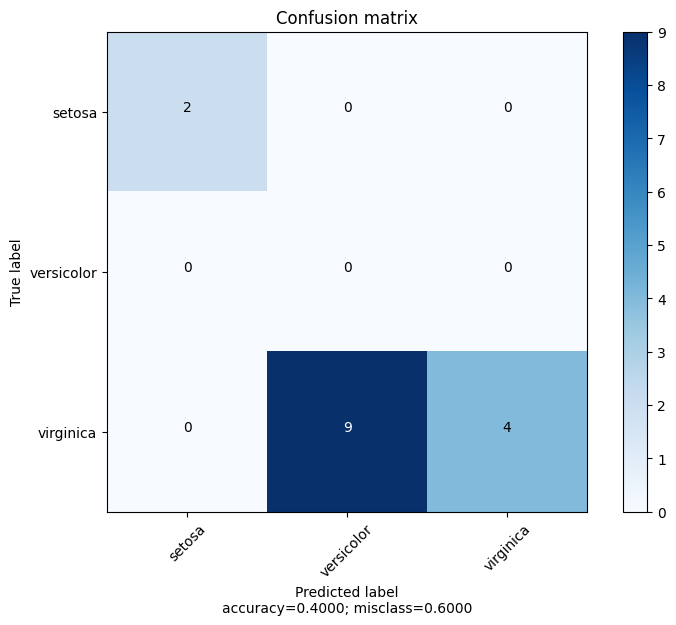

In [15]:
plot_confusion_matrix(cm, data.target_names, normalize=False)